## Import necessary packages


In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from KMeans import KMeans

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans as Ref
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### <font color='red'>ATTENTION: THERE ARE A TOTAL OF 6 QUESTIONS THAT NEED YOUR ANSWERS</font>

# Experiment: Synthetic Data

First, let's play with our model on some synthetic data that have clear separation for different clusters. Here, let's make a dataset of 100 elements in 5 different clusters with 10 dimensions and visualize it by manifolding it into a 2D space with t-SNE.

Note: The distance that you can observe from the t-SNE visualization may be significantly different from the real distance due to the manifold embedding. Please refer to the PCA and T-SNE lecture for more details.

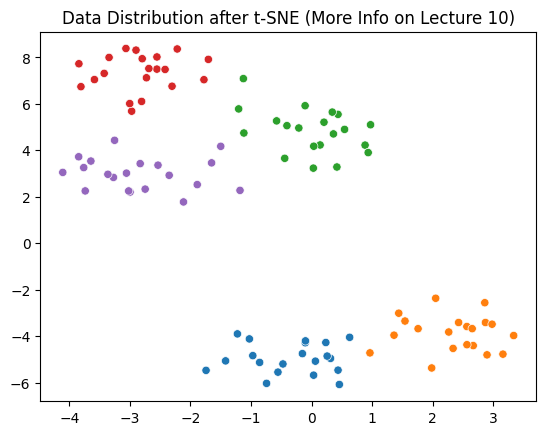

In [30]:
X, y = make_blobs(n_samples=100, centers=5, n_features=10, random_state=42, cluster_std=2, center_box=(0, 10))

dims = TSNE(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
plt.title('Data Distribution after t-SNE (More Info on Lecture 10)');

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 3
Early Stopped at Iteration 3


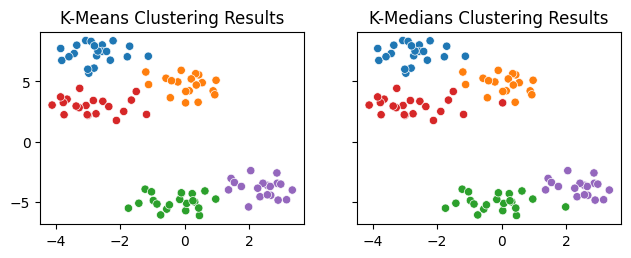

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(5, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions
y_pred_kmeans = KMeans(5, order=2).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
y_pred_kmedians = KMeans(5, order=1).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 1: From the above two figures, which one seems better compared to the original data distribution with actual cluster indices? Can you list some possible reasons why one way performs better than the other way?** </font>

Hint: Think of how we make the synthetic data. Also, next cell block shows the detailed clustering progress over each iteration.

Answer:

It appears that the K-means seems slightly better this case. Firstly, it appears to have a clearer boundary between the groups. Additionally there is more distributed amount of points in the groups in the Kmeans. 

Let's see how the clustering goes over each iteration

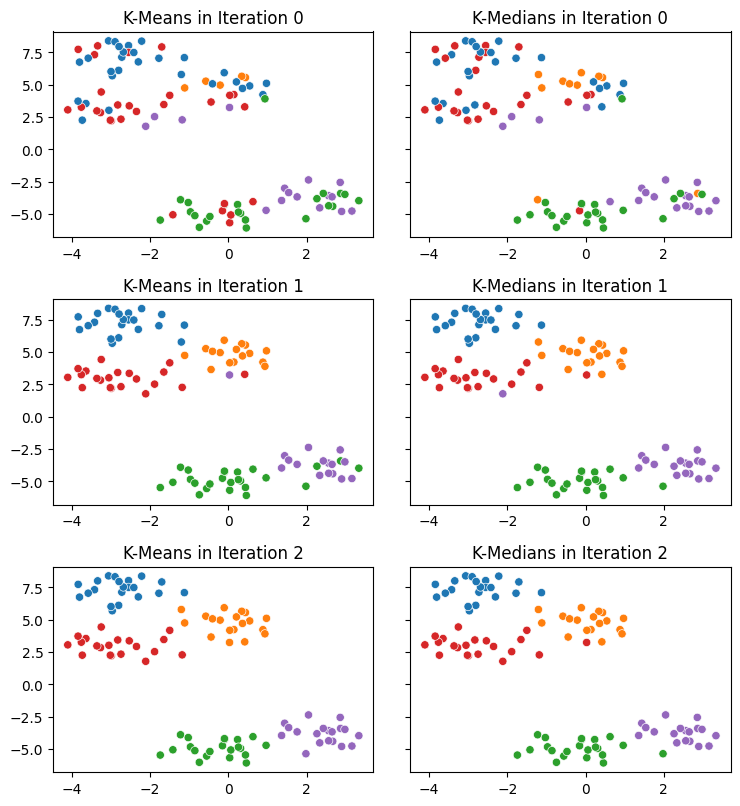

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(7.5, 8), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Don't worry about the fact that we train a separate model for each iteration
# since we used a fixed random seed to ensure initialization consistency
for i in range(3):
    y_pred = KMeans(5, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(5, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False);

Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should have one of the models (K-Means, K-Medians) to have the same mutual info score as sklearn's implementation.

In [33]:
print(y)  
print(ref_kmeans)
print(y_pred_kmeans)
print(y_pred_kmedians)



[0 2 0 1 1 0 4 3 1 3 0 3 2 1 2 4 4 2 1 2 3 4 4 0 3 2 4 3 2 1 3 4 4 2 4 3 4
 2 2 4 0 3 3 3 1 3 2 1 2 0 3 4 0 0 1 2 1 2 4 2 4 4 0 3 0 1 4 1 0 4 3 2 3 2
 1 3 1 0 3 0 2 4 0 1 0 1 1 0 0 0 2 2 1 0 4 1 3 3 4 1]
[0 3 0 1 1 0 4 2 1 2 0 2 3 1 3 4 4 3 1 3 2 4 4 0 2 3 4 2 3 1 2 4 4 3 4 2 4
 3 3 4 0 2 2 2 1 2 3 1 3 0 2 4 0 0 1 3 1 3 4 3 4 4 0 2 0 1 4 1 0 4 2 3 2 3
 1 2 1 0 2 0 2 4 0 1 0 1 1 0 0 0 3 3 1 0 4 1 2 2 4 0]
[2 1 2 4 4 2 3 0 4 0 2 0 1 4 1 3 3 1 4 1 0 3 3 2 0 1 3 0 1 4 0 3 3 1 3 0 3
 1 1 3 2 0 0 0 4 0 1 4 1 2 0 3 2 2 4 1 4 1 3 1 3 3 2 0 2 4 3 4 2 3 0 1 0 1
 4 0 4 2 0 2 0 3 2 4 2 4 4 2 2 2 1 1 4 2 3 4 0 0 3 2]
[2 1 2 4 4 2 3 0 4 0 2 0 1 4 1 3 3 1 4 1 0 3 3 2 0 1 3 0 1 4 0 3 3 1 3 0 3
 1 1 3 2 0 0 0 4 0 1 4 1 2 0 3 2 2 4 1 4 1 3 1 3 3 2 0 2 4 3 4 2 3 0 3 0 1
 4 0 4 2 0 2 0 3 2 4 2 4 4 2 2 2 1 1 2 2 3 4 0 0 3 2]


In [36]:
pd.DataFrame({'Reference K-Means from Sklearn vs Ground Truth': adjusted_mutual_info_score(ref_kmeans, y),
              'Our K-Means vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
              'Our K-Medians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y)}, 
              index=['Mutual Info Score']).T

,Mutual Info Score
Reference K-Means from Sklearn vs Ground Truth,0.947515
Our K-Means vs Ground Truth,0.947515
Our K-Medians vs Ground Truth,0.904241


## Wait... What happens when we have just one outlier?

Now, let's change one observation in the dataset to be an outlier. That is, we'll set the value of the first dimension of the first point in the dataset to be `100`. Other than that, the rest of the dataset is kept completely the same as before.

As you can see in the below visualization, the manifolded figrue with t-SNE shows that there started to have points belonging to a particular cluster (according to the ground truth) appearing in the side of anothor cluster. However, if we discard the coloring of the below figure, we can still see that our dataset roughly has 5 clusters and each cluster contains an equal size of observations. We will see if this will affect the performance of our models.

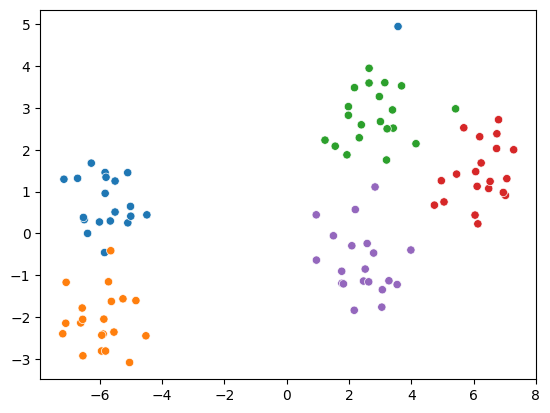

In [38]:
# let's make an outlier here
X[0][0] = 100

dims = TSNE(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False);

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 4
Early Stopped at Iteration 3


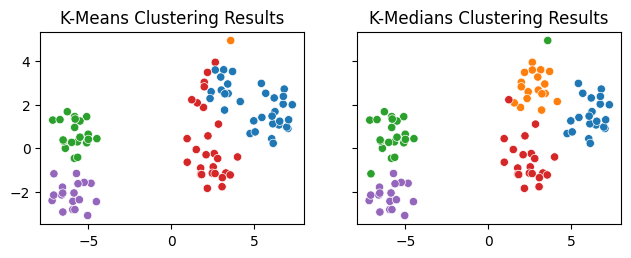

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(5, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions
y_pred_kmeans = KMeans(5, order=2).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
y_pred_kmedians = KMeans(5, order=1).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 2: From the above two figures, which one seems better compared to the original data distribution with actual cluster indices? Can you list some possible reasons why one way performs better than the other way?** </font>

Hint: Think of how we make the synthetic data. Also, think of the consequences of using means vs using medians in finding the centers.

Answer: The K-Medians performed better, as the orange group is practically gone in the clusters in the K-mean. Also in the K-Mean, the blue and red group mixed. The K-medians have clear separation groups making it the better distribution. Outlier should affect the K-Mean, as it uses the mean to calculate the update clusters, leading to the mixed/missing clusters. The Median is also at advantage when it comes to outliers, from it using the median as it better at maintaining separation from using the median to update clusters.

Let's see how the clustering goes over each iteration

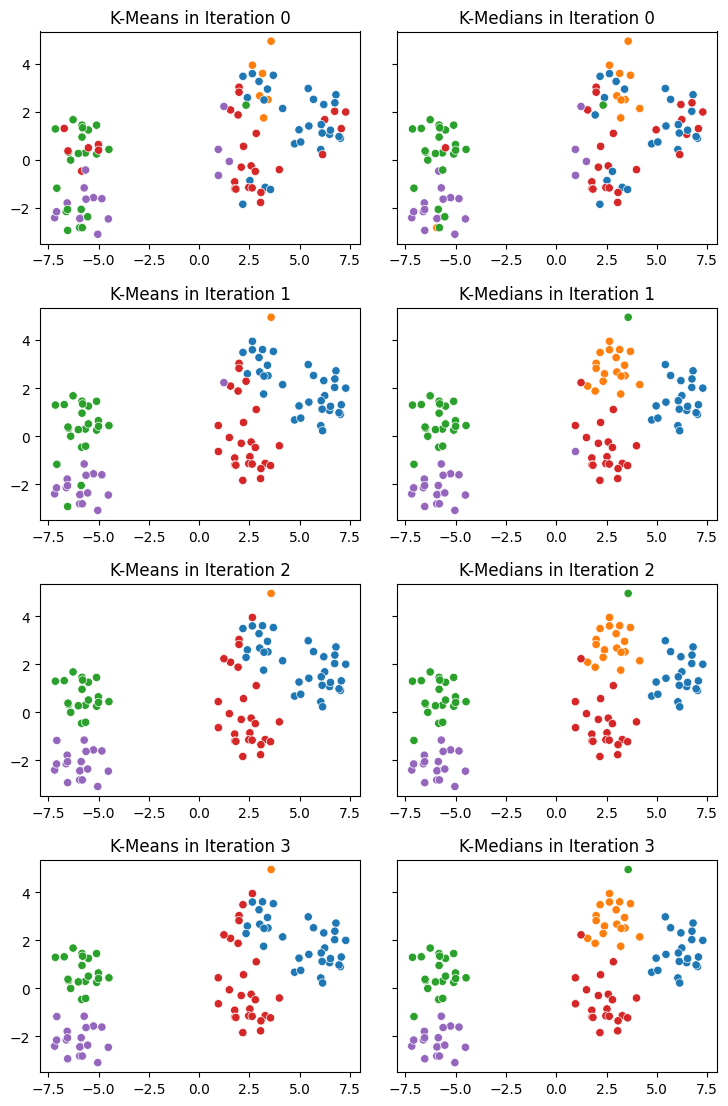

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(7.5, 11), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

for i in range(4):
    y_pred = KMeans(5, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(5, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False);

Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should one of the scores higher than the reference score, and the other score lower than the reference score.

In [20]:
pd.DataFrame({'Reference KMeans from Sklearn vs Ground Truth': adjusted_mutual_info_score(ref_kmeans, y),
              'Our KMeans vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
              'Our KMedians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y)}, 
              index=['Mutual Info Score']).T

,Mutual Info Score
Reference KMeans from Sklearn vs Ground Truth,0.862091
Our KMeans vs Ground Truth,0.781036
Our KMedians vs Ground Truth,0.904241


<font color='red'> **Question 3: After the above experiments, (1)Can you summarize when is better to use Euclidean distance for K-Means, and when is better to use Manhattan distance for K-Medians? (2)If a model performs better on K-Medians than the most popular K-Means, what does that mean for the dataset? (3)Are there ways you can manipulate the dataset a little bit to make the model achieve a better performance on K-Means? (4)You may noticed that Sklearn's KMeans algorithms performs better than our KMeans algorithm. What could be the cause here?** </font>

Answer:

Euclidean distance and K-Means performs best when clusters are spherical and have similar variance. Typically it is best to use K - median in more irregular clusters where points are elongated. Typically if a model performs better on K-Medians it means that there are outlier in the dataset. To make K-Means apply better you can possibly use PCA, have more clusters to mitigate outlier, K++ initialization, and even remove the outliers in the dataset. The Sklearn's K-Means can perform better from having more optimized algorithms and initilzations. It is possible that they used PCA and/or K++ means to perform better.

# Experiment: Real-World Data

Now, after that we have dealt with some synthetic data, which come from a normal distribution at different centers, we will evaluate our model's performance on real-world data. Here, we will be using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Let's first visualize our data using [Multi-Dimensional Scaling](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling), which is another way to visualize multi-dimensional data into a 2D space.

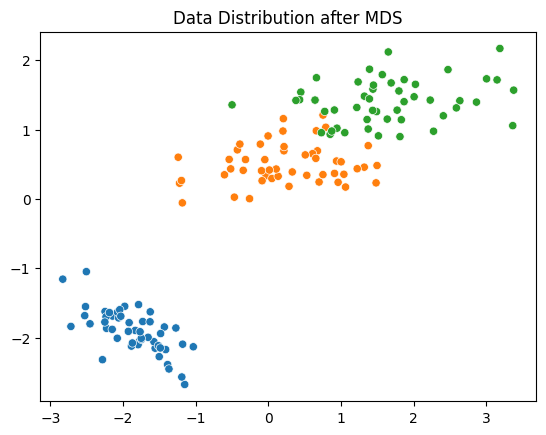

In [21]:
data = datasets.load_iris()
X, y = data['data'], data['target']

dims = MDS(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
plt.title('Data Distribution after MDS');

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 5
Early Stopped at Iteration 4


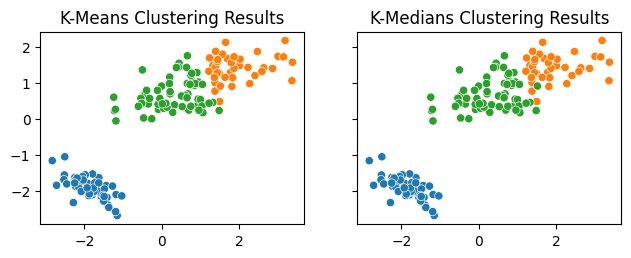

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(3, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions
y_pred_kmeans = KMeans(3, order=2).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
y_pred_kmedians = KMeans(3, order=1).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 4: From the above results, do our models still perform that well compared to the expereiment where we used the synthetic data? What makes the difference in real-life data?** </font>

Answer:

In comparing the clustering results on real-life data versus synthetic data, the models may not perform as well due to the complexities and irregularities in real-world datasets. Unlike synthetic data, which is often generated with well-defined and has easily separable clusters, real-life data tends to have overlapping distributions, noise, and outliers that make clustering more challenging.

Let's see how the clustering goes over each iteration

Early Stopped at Iteration 4


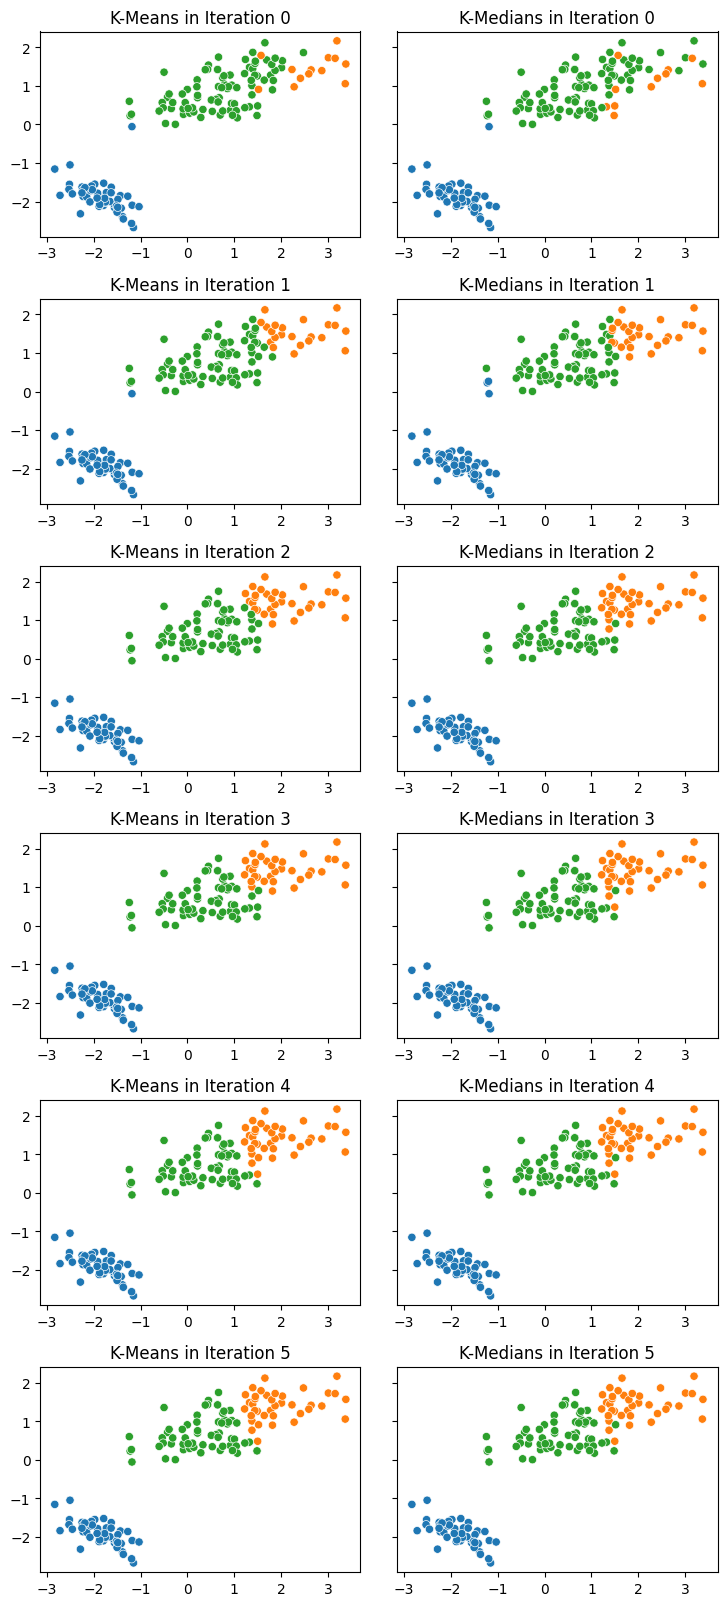

In [23]:
fig, axes = plt.subplots(6, 2, figsize=(7.5, 16), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

for i in range(6):
    y_pred = KMeans(3, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(3, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False);

Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should have one of the models (K-Means, K-Medians) to have the same mutual info score as sklearn's implementation.

In [24]:
pd.DataFrame({'Reference KMeans from Sklearn vs Ground Truth': adjusted_mutual_info_score(ref_kmeans, y),
              'Our KMeans vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
              'Our KMedians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y)}, 
              index=['Mutual Info Score']).T

,Mutual Info Score
Reference KMeans from Sklearn vs Ground Truth,0.755119
Our KMeans vs Ground Truth,0.755119
Our KMedians vs Ground Truth,0.747583


## But most often time... we don't know how many clusters are there beforehand

Let us turn back to the synthetic data. For this part of the experiment, there are 1000 points in our data, and it should have 4 features and 4 centers (or 4 different types/labels).

In [25]:
X, y = make_blobs(n_samples=1000, n_features=4, centers=4, cluster_std=2.5, random_state = 15)

<Axes: >

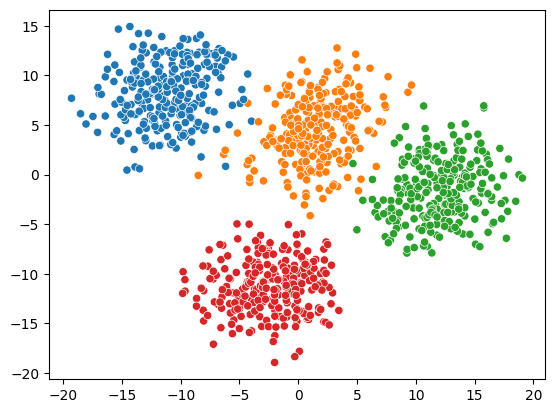

In [26]:
dims = MDS(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)

We will train our model using k from 2 to 10, and store the Sum of Squares Error per cluster for each k.

SSE per cluster is the squared distances between points in a cluster and the cluster center. It indicates how "compact" each cluster is.

In [27]:
SSE = []
y_preds = []

for i in range(2, 10):
    clf = KMeans(i, order=2)
    clf.fit(X)
    y_pred = clf.predict(X)
    SSE_jlst = []
    for j in range(i):
        SSE_j = 0
        idx = np.array(y_pred == j)
        for xj in X[idx]:
            se = np.linalg.norm((xj - clf.centers[j]), ord = 2)
            SSE_j += se
        SSE_jlst.append(SSE_j)
    SSE.append(sum(SSE_jlst) / i)
    y_preds.append(y_pred)

Early Stopped at Iteration 5
Early Stopped at Iteration 9
Early Stopped at Iteration 13
Early Stopped at Iteration 18
Early Stopped at Iteration 18
Early Stopped at Iteration 17
Early Stopped at Iteration 22
Early Stopped at Iteration 22


After training our model, let's plot SSE against k. Pay attention to the trend and see if you can find a tipping point. A tipping point sometimes indicates a balance point for our model; increasing k furthur would lead to overfitting.

Text(0.5, 1.0, 'Sum of Squared Errors vs. k')

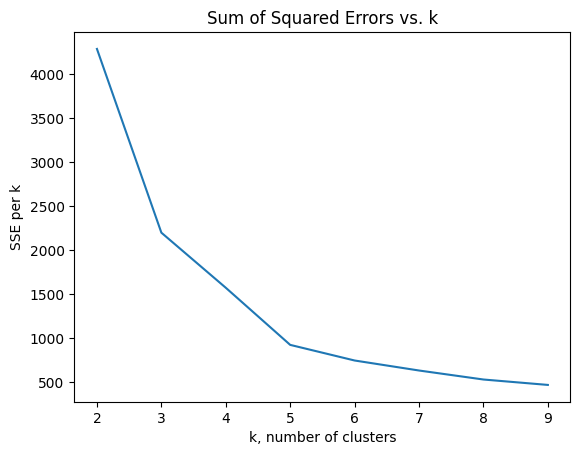

In [28]:
x = range(2, 10)
plt.plot(x, SSE)
plt.xlabel("k, number of clusters")
plt.ylabel("SSE per k")
plt.title('Sum of Squared Errors vs. k')

<font color='red'> **Question 5: Can you find the most reasonable k based on this metric? Recall that we should have 4 clusters in this dataset. With that in mind, can you completely trust some metrics that help you determine how many clusters to use? What are the takeaways from this part of the experiment?** </font>

Answer:

The most reasonable k based on the SSE metric is 4. This aligns with the expected number of clusters in the dataset. But, relying solely on the SSE may not always be sufficient in real world applications/data, so using multiple evaluation techniques is the best practice. My takeaway was that SSE is one of the methods that can be used to help determine cluster size.

<font color='red'> **Question 6: In designing our model, we simplified some steps to make this implementation process easier. Can you list some potential improvements that can possibly make our model better when encountering data with noises or outliers, data with different types of distributions, or data where clusters have various distances of separation? (Hint: consider how we can work on initialization, assigning centers, data processing within the model, etc to make it better).** </font>

Answer:

The first thing we can do to improve out model is use K++ means, this can help with our initialization, by having better separation. Additionally we can apply PCA, this can help us removing overlapping data with dimension reduction. Especially in real world data sets that are large, there can often be redundant data, where PCA can help our model and save on compute power. 

In [ ]:
import numpy as np

class KMeans():
    # This function initializes the KMeans class
    def __init__(self, k=3, num_iter=1000, order=2):
        # Set a seed for easy debugging and evaluation
        np.random.seed(42)
        
        # This variable defines how many clusters to create
        # default is 3
        self.k = k

        # This variable defines how many iterations to recompute centroids
        # default is 1000
        self.num_iter = num_iter

        # This variable stores the coordinates of centroids
        self.centers = None

        # This variable defines whether it's K-Means or K-Medians
        # an order of 2 uses Euclidean distance for means
        # an order of 1 uses Manhattan distance for medians
        # default is 2
        if order == 1 or order == 2:
            self.order = order
        else:
            raise Exception("Unknown Order")

    # This function fits the model with input data (training)
    def fit(self, X):
        # m, n represent the number of rows (observations) 
        # and columns (positions in each coordinate)
        m, n = X.shape

        # self.centers are a 2d-array of 
        # (number of clusters, number of dimensions of our input data)
        self.centers = np.zeros((self.k, n))

        # self.cluster_idx represents the cluster index for each observation
        # which is a 1d-array of (number of observations)
        self.cluster_idx = np.zeros(m)

        ##### TODO 1 ######
        #
        # Task: initialize self.centers
        #
        # Instruction: 
        # For each dimension (feature) in X, use the 10th percentile and 
        # the 90th percentile to form a uniform distribution. Then, we will initialize 
        # the values of each center by randomly selecting values from the distributions.
        #
        # Note:
        # This method is by no means the best initialization method. However, we would
        # like you to follow our guidelines in this HW. We will ask you to discuss some better
        # initializaiton methods in the notebook.
        #
        # Hint:
        # 1. np.random.uniform(), np.percentile() might be useful
        # 2. make sure to look over its parameters if you're not sure
        ####################
        for i in range(n):
            lower_bound = np.percentile(X[:, i], 10)
            upper_bound = np.percentile(X[:, i], 90)
            self.centers[:, i] = np.random.uniform(lower_bound, upper_bound, self.k)
        ##### END TODO 1 #####

        for i in range(self.num_iter):
            # new_centers are a 2d-array of 
            # (number of clusters, number of dimensions of our input data)
            new_centers = np.zeros((self.k, n))

            ##### TODO 2 ######
            #
            # Task: calculate the distance and create cluster index for each observation
            #
            # Instruction:
            # You should calculate the distance between each observation and each centroid
            # using specified self.order. Then, you should derive the cluster index for 
            # each observation based on the minimum distance between an observation and 
            # each of the centers.
            #
            # Hint:
            # 1. np.linalg.norm() might be useful, along with parameter axis, ord
            # for that function
            # 2. You can transpose an array using .T at the end
            # 3. np.argmin() might be useful along with parameter axis in finding
            # the desired cluster index of all observations
            #
            # IMPORTANT: 
            # Copy-paste this part of your implemented code
            # to the predict function, and return cluster_idx in that function
            ####################
            distances = np.linalg.norm(X[:, np.newaxis] - self.centers, ord=self.order, axis=2)
            cluster_idx = np.argmin(distances, axis=1)
            ##### END TODO 2 #####

            ##### TODO 3 ######
            #
            # Task: calculate the coordinates of new_centers based on cluster_idx
            #
            # Instruction:
            # You should assign the coordinates of the new_center by calculating
            # mean/median of the coordinates of observations belonging to the same
            # cluster.
            #
            # Hint:
            # 1. np.mean(), np.median() with axis might be helpful
            ####################
            for idx in range(self.k):
                cluster_coordinates = X[cluster_idx == idx]
                if len(cluster_coordinates) > 0:
                    if self.order == 2:
                        cluster_center = np.mean(cluster_coordinates, axis=0)
                    elif self.order == 1:
                        cluster_center = np.median(cluster_coordinates, axis=0)
                    new_centers[idx, :] = cluster_center
                else:
                    new_centers[idx, :] = self.centers[idx, :]  # Keep the old center if no points are assigned
            ##### END TODO 3 #####

            ##### TODO 4 ######
            #
            # Task: determine early stop and update centers and cluster_idx
            #
            # Instructions:
            # You should stop tranining as long as cluster index for all
            # observations is the same as the previous iteration
            # Hint:
            # 1. .all() might be helpful
            ####################
            if (cluster_idx == self.cluster_idx).all():
                print(f"Early Stopped at Iteration {i}")
                return self
            self.centers = new_centers
            self.cluster_idx = cluster_idx
            ##### END TODO 4 #####
        return self

    # This function makes predictions with input data
    # Copy-paste your code from TODO 2 and return cluster_idx
    def predict(self, X):
        ##### Predict function ######
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers, ord=self.order, axis=2)
        cluster_idx = np.argmin(distances, axis=1)
        return cluster_idx